In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle
warnings.filterwarnings("ignore")

In [85]:
df=pd.read_csv('UpdatedResumeDataSet.csv')

In [86]:
df.shape

(962, 2)

In [87]:
df.columns

Index(['Category', 'Resume'], dtype='object')

In [88]:
print(df['Category'].iloc[400])

Java Developer


In [89]:
print(df['Resume'].iloc[400])

TECHNICAL SKILLS Programming Languages: Java (Servlet, JSP, Spring Boot). Web Technology: HTML5, CSS3, Bootstrap, JavaScript, JQuery, Ajax, AngularJs. Database: MySQL. IDE and Tool: Eclipse, spring tool Suit, Net beans, Sublime Text, Atom. Operating System: Windows XP, 7, 8, 10. ACHIEVEMENT â¢ Java Developer Certificate from Unanth Technical Institute. â¢ Java Certificate from solo Learn. â¢ Command line crash Course certificate from Udemy. JOB DETAILS Education Details 
January 2018 M.C.A  Pune, Maharashtra Pune University
January 2015 B.C.A  Amravati, Maharashtra Amravati University
January 2012 H.S.C  Amravati, Maharashtra Amravati University
January 2010 S.S.C  Amravati, Maharashtra Amravati University
Java developer 

Full Stack Java Developer
Skill Details 
Css- Exprience - Less than 1 year months
Ajax- Exprience - Less than 1 year months
Servlet- Exprience - Less than 1 year months
Html5- Exprience - Less than 1 year months
Spring- Exprience - Less than 1 year months
Java- Ex

In [90]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

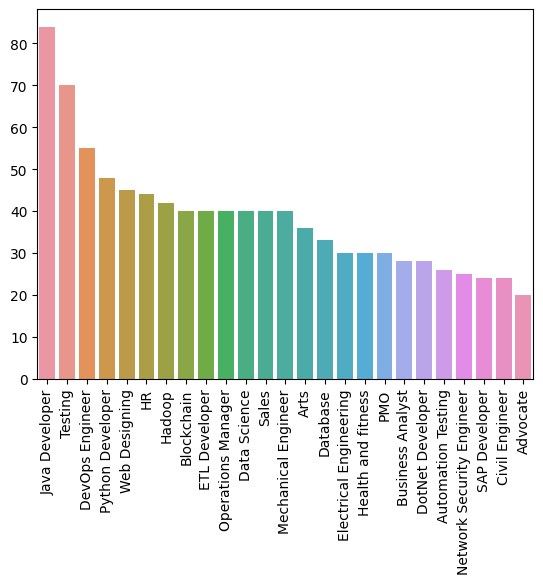

In [91]:
sns.barplot(x=df['Category'].value_counts().index,y=df['Category'].value_counts().values,data=df)
plt.xticks(rotation=90)
plt.show()

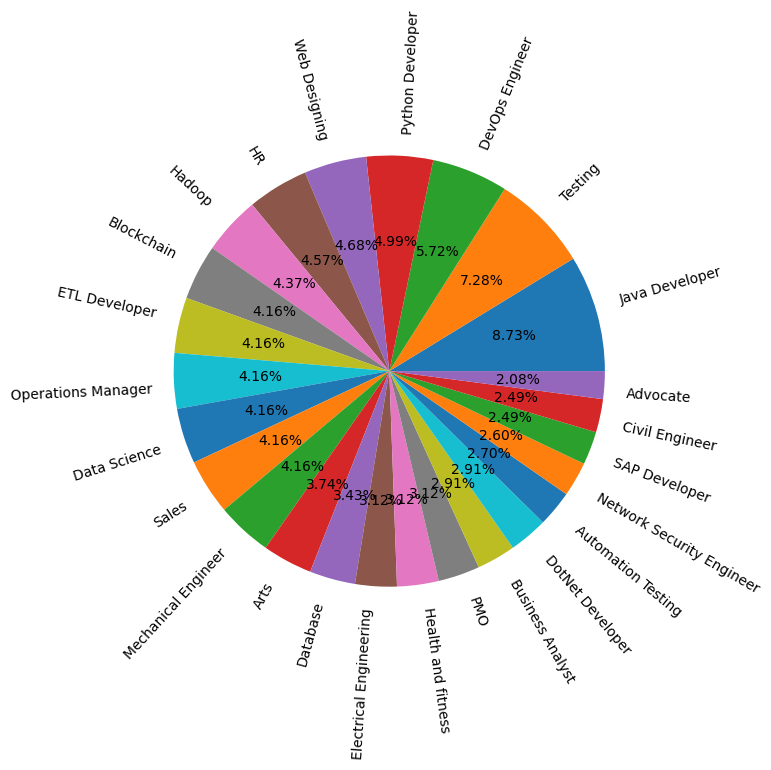

In [92]:
plt.figure(figsize=(7,7))
plt.pie(labels=df['Category'].value_counts().index,x=df['Category'].value_counts().values,data=df,autopct='%.2f%%',rotatelabels=90,)
plt.show()

In [93]:
df['Resume'].iloc[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [94]:
from purifytext import clean_text

In [95]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [96]:
df.shape

(962, 2)

In [97]:
df=clean_text(dataframe=df,column_name='Resume')


=== Cleaning Process ===

⬇️ Removing HTML Tags ⬇️

⬇️ Lowercasing Text ⬇️

⬇️ Removing URLs ⬇️

⬇️ Removing Emojis ⬇️

⬇️ Removing Punctuation ⬇️

⬇️ Removing Special Characters ⬇️

⬇️ Removing Numbers ⬇️

⬇️ Removing Whitespace ⬇️

⬇️ Expanding Contractions ⬇️

⬇️ Removing Stopwords ⬇️

⬇️ Lemmatizing Words ⬇️

=== Cleaning Completed ===



In [98]:
df.iloc[0]

Category                                         Data Science
Resume      skill programming language python panda numpy ...
Name: 0, dtype: object

In [99]:
CORPUS = np.array(df['Resume'])
type(CORPUS)

numpy.ndarray

In [100]:
y=df['Category']

In [101]:
label_encoder = LabelEncoder()

In [102]:
y = label_encoder.fit_transform(y)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    CORPUS, y, test_size=0.2, random_state=42
)

In [104]:
pipeline_lr=Pipeline(steps=[("vectorizer", TfidfVectorizer()), ("model", LogisticRegression())])

In [105]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', LogisticRegression())])

In [106]:
y_train_pred = pipeline_lr.predict(X_train)
y_test_pred = pipeline_lr.predict(X_test)
    # Print classification report
print("Training Report")
print(f"Random Forest Classification Report:")
print(classification_report(y_train, y_train_pred))

    # Print confusion matrix
print(f"Random Forest Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Test Report")
    # Print classification report
print(f"Random Forest Classification Report:")
print(classification_report(y_test, y_test_pred))

    # Print confusion matrix
print(f"Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Training Report
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        30
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        25
           8       1.00      0.98      0.99        41
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        33
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        38
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        69
          16       1.00     

In [107]:
def prediction(resume):
    resume_df = pd.DataFrame([resume], columns=["Resume"])
    clean_df = clean_text(dataframe=resume_df, column_name="Resume")
    CORPUS = np.array(clean_df["Resume"])
    pred = pipeline_lr.predict(CORPUS)
    return label_encoder.inverse_transform(pred)[0]

In [115]:
resume=df['Resume'].sample().iloc[0]

In [116]:
print(resume)

skill set hadoop map reduce hdfs hive sqoop java duration role hadoop developer rplus offer quick simple powerful cloud based solution demand sense accurately predict demand product market combine enterprise external data predict demand accurately us social conversation sentiment derive demand identifies significant driver sale horde factor selects best suited model multiple forecasting model product responsibility involved deploying product customer gathering requirement algorithm optimization backend product load transform large datasets structured semi structured responsible manage data coming different source application supported map reduce program running cluster involved creating hive table loading data writing hive query run internally map reduce wayeducation detail hadoop developer hadoop developer braindatawire skill detail apache hadoop hdfs exprience month apache hadoop sqoop exprience month hadoop exprience month hadoop exprience month hadoop distributed file system exprie

In [117]:
prediction(resume)


=== Cleaning Process ===

⬇️ Removing HTML Tags ⬇️

⬇️ Lowercasing Text ⬇️

⬇️ Removing URLs ⬇️

⬇️ Removing Emojis ⬇️

⬇️ Removing Punctuation ⬇️

⬇️ Removing Special Characters ⬇️

⬇️ Removing Numbers ⬇️

⬇️ Removing Whitespace ⬇️

⬇️ Expanding Contractions ⬇️

⬇️ Removing Stopwords ⬇️

⬇️ Lemmatizing Words ⬇️

=== Cleaning Completed ===



'Hadoop'

In [130]:
resume=df['Resume'].sample().iloc[0]

In [131]:
print(resume)

skill bitcoin ethereum solidity hyperledger beginner go beginner r corda beginner tendermint nodejs c programming java machine learning specilaized brain computer interface computer networking server admin computer vision data analytics cloud computing reactjs angulareducation detail january january bachelor engineering computer science engineering thakur college engineering technology september march dynamic blood bank system mumbai maharashtra iit january cbse senior secondary january cbse banking vidyashram public school blockchain developer blockchain developer zhypility technology skill detail networking exprience month data analytics exprience month computer vision exprience month java exprience month machine learning exprience monthscompany detail company zhypility technology description une company area business owner amway enterprise limited description business strategizing promotion analytics networking term company virtual description developing prototype smart india hackth

In [132]:
prediction(resume)


=== Cleaning Process ===

⬇️ Removing HTML Tags ⬇️

⬇️ Lowercasing Text ⬇️

⬇️ Removing URLs ⬇️

⬇️ Removing Emojis ⬇️

⬇️ Removing Punctuation ⬇️

⬇️ Removing Special Characters ⬇️

⬇️ Removing Numbers ⬇️

⬇️ Removing Whitespace ⬇️

⬇️ Expanding Contractions ⬇️

⬇️ Removing Stopwords ⬇️

⬇️ Lemmatizing Words ⬇️

=== Cleaning Completed ===



'Blockchain'

In [111]:
with open('model.pkl', 'wb') as file:
    pickle.dump(pipeline_lr, file)

with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)